In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('hwv_competitors.csv')
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Day of Week'] = df['Check-in Date'].dt.day_name()

#Get only the most recent data
df = df[df['Report Date'] == df['Report Date'].max()]
df

,Room Type,Guests,Price,Rating,Check-in Date,Report Date,HWV Property,Competitor,Day of Week
0,Deluxe King Room,2,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday
1,Deluxe King Room Upstairs,2,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday
2,Standard Queen Room with Two Queen Beds,4,139,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday
3,Deluxe Queen Room with Two Queen Beds,4,163,8.6,2025-01-03,2025-01-02,HH,Pea Soup Andersens,Friday
4,Deluxe King Room,2,185,8.6,2025-01-04,2025-01-02,HH,Pea Soup Andersens,Saturday
...,...,...,...,...,...,...,...,...,...
3037,King Studio Suite - Non Smoking,4,283,8.8,2025-02-01,2025-01-02,SWI,Hampton Inn,Saturday
3038,King Studio Suite - Non Smoking,4,289,8.8,2025-02-01,2025-01-02,SWI,Hampton Inn,Saturday
3039,King Studio Suite with Mountain View - Non-Smo...,4,275,8.8,2025-02-01,2025-01-02,SWI,Hampton Inn,Saturday
3040,King Studio Suite with Mountain View - Non-Smo...,4,293,8.8,2025-02-01,2025-01-02,SWI,Hampton Inn,Saturday


In [46]:
def plot_pricing(df,prop,figsize = (10,6)):
    sns.set_theme(context='notebook',style = 'whitegrid')
    report_date = df['Report Date'][0].strftime('%m/%d/%Y')
    filtered = df[df['HWV Property'] == prop]

    plt.figure(figsize=figsize)
    sns.lineplot(x='Check-in Date', y='Price', hue = 'Competitor', data=filtered)

    # Format the x-axis to show dates more sparsely
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show every 5th day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate date labels for better readability
    plt.gcf().autofmt_xdate()
    plt.title(f"{prop} Compset Pricing Report: {report_date}",fontweight = 'bold')
    plt.show()
def plot_dow(df,prop,figsize = (10,6)):
    sns.set_theme(context = 'notebook',style = 'darkgrid')
    report_date = df['Report Date'][0]
    
    report_start = report_date.strftime('%m/%d/%y')
    report_end = (report_date + timedelta(days = 30)).strftime('%m/%d/%y')
    plt.figure(figsize=figsize)
    filtered = df[df['HWV Property'] == prop]
    sns.barplot(data=filtered, x='Day of Week',y='Price',hue='Competitor')
    plt.title(f"{prop} Compset - Average Price by Day of Week: ({report_start} - {report_end})",fontweight = 'bold')
    plt.show()
def plot_room_types(df,prop):
    sns.set_theme(context='notebook',style = 'whitegrid')

    filtered = df[df['HWV Property'] == prop]
    report_date = df['Report Date'][0]
    report_start = report_date.strftime('%m/%d/%y')
    report_end = (report_date + timedelta(days = 30)).strftime('%m/%d/%y')
    
    comps = filtered['Competitor'].unique()
    num_comps = len(comps)
    fig ,ax = plt.subplots(num_comps,1,figsize = (10,4*num_comps))
    for i, comp in enumerate(comps):
        comp_data = filtered[filtered['Competitor'] == comp]
        sns.barplot(data = comp_data, x = 'Price', y = 'Room Type', hue = 'Room Type', ax = ax[i])
        sns.despine(left=True)
        ax[i].set_title(comp)
        ax[i].set_ylabel('')
    plt.tight_layout()
    fig.suptitle(f"{prop} Compset: Average Pricing by Room Type ({report_start} - {report_end})",fontweight = 'bold')
    plt.subplots_adjust(top=0.93)
    plt.show()


def get_graphs(df,prop,figsize = (10,6)):
    plot_pricing(df,prop, figsize = figsize)
    plot_dow(df,prop, figsize = figsize)
    plot_room_types(df,prop)

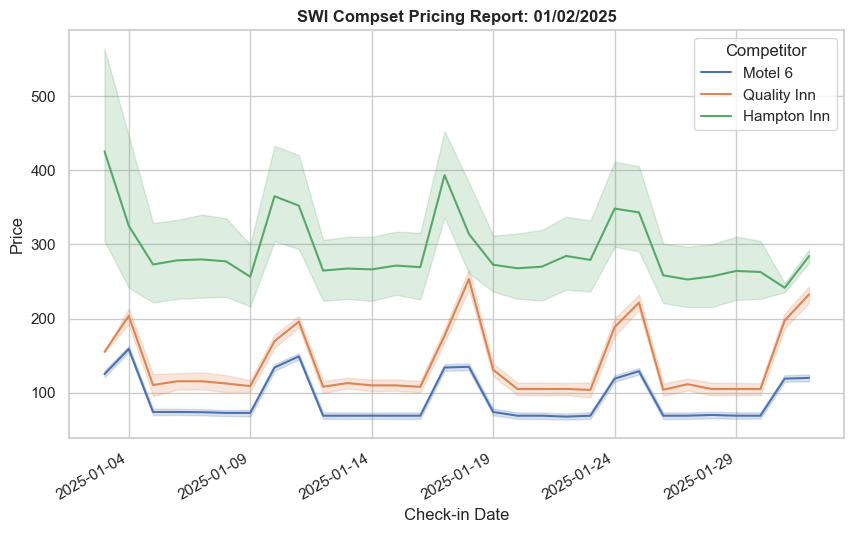

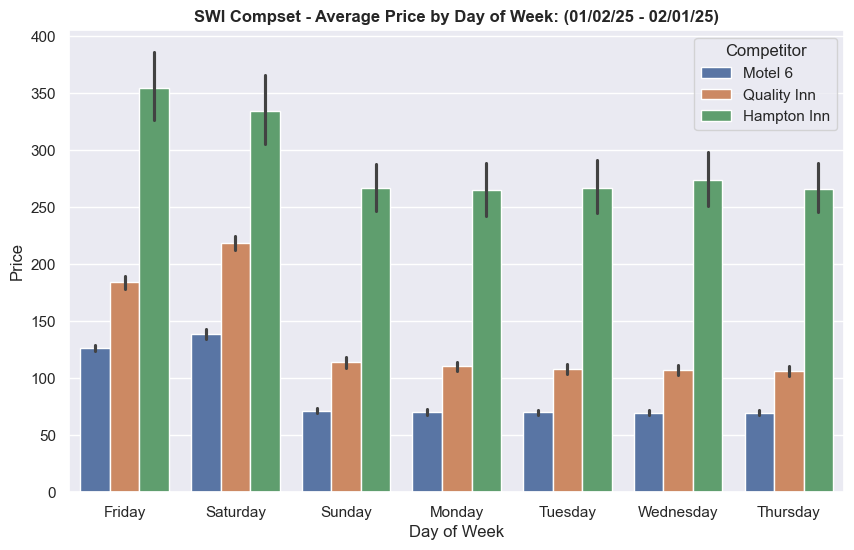

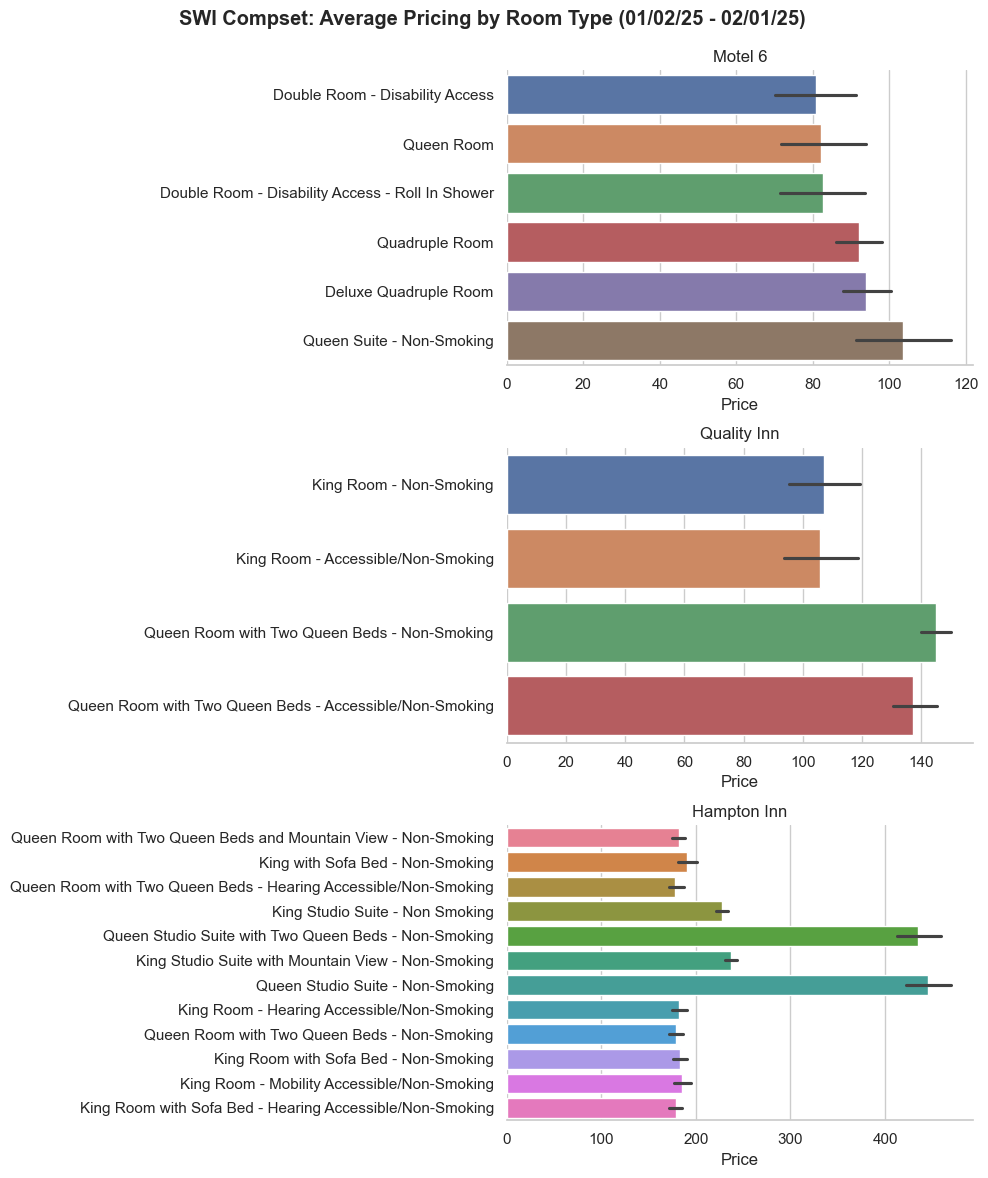

In [47]:
get_graphs(df,'SWI')